In [105]:
from simphony.classical import ClassicalSim
import jax.numpy as jnp
import quantp as qp
import numpy as np
import matplotlib.pyplot as plt



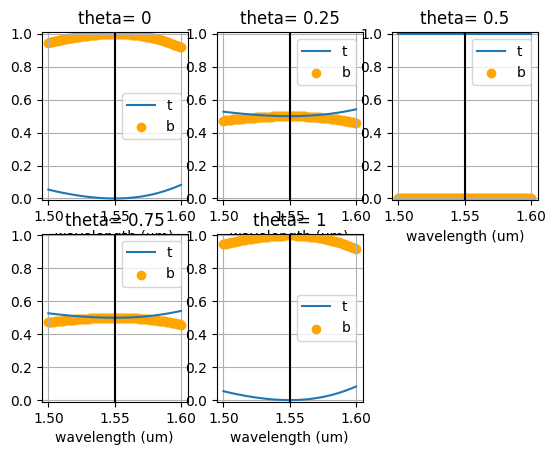

In [106]:
wl = jnp.linspace(1.5, 1.6, 100)
ar=[0,0.25,0.5,0.75,1]
t=1

for i in ar:
    sim = ClassicalSim(ckt=qp.trr, wl=wl, theta=i, phi=1)
    laser_t = sim.add_laser(ports=["int"], power=1.0)
    laser_b = sim.add_laser(ports=["inb"], power=0.0)
    detector_t = sim.add_detector(ports=["outt"])
    detector_b = sim.add_detector(ports=["outb"])
    result = sim.run()


    plt.subplot(2,3,t)
    plt.plot(wl, np.abs(result.sdict['outt'])**2, label='t')
    plt.scatter(wl, np.abs(result.sdict['outb'])**2, label='b',color='orange')
    plt.axvline(x=1.55, color='k')
    plt.legend()
    plt.grid()
    plt.title("theta= "+ str(i))
    plt.ylim([-0.01,1.01])
    plt.xlabel("wavelength (um)")
    t=t+1